In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from sklearn.mixture import GaussianMixture

In [ ]:
# Define the columns to load
columns_to_load = ['CFHT_u_MAG_APER2', 'HSC_g_MAG_APER2', 'HSC_r_MAG_APER2', 'HSC_i_MAG_APER2', 'HSC_z_MAG_APER2', 'HSC_y_MAG_APER2', 'lp_zBEST','lp_MG',             # g-band magnitude
    'lp_MR',             # r-band magnitude
    'lp_MI',             # i-band magnitude
    'lp_MZ',             # z-band magnitude
    'lp_MY',             # Y-band magnitude
    'HSC_g_FLUX_APER2', # g-band flux (aper 2)
    'HSC_r_FLUX_APER2', # r-band flux (aper 2)
    'HSC_i_FLUX_APER2', # i-band flux (aper 2)
    'HSC_g_MAG_APER2',  # g-band mag (aper 2)
    'HSC_r_MAG_APER2',  # r-band mag (aper 2)
    'HSC_i_MAG_APER2',  # i-band mag (aper 2)
    'lp_mass_med',       # Stellar mass
    'lp_age',            # Age of best-fit template
    'EBV_MW',            # Galactic extinction
    'FLAG_HSC',          # HSC data quality flag
    'FLAG_SUPCAM',       # Suprime-Cam data quality flag
    'FLAG_UVISTA',       # UltraVISTA data quality flag
    'lp_SFR_med',        # Star formation rate
    'lp_dust',           # Color excess
    'ACS_MU_CLASS']
# Load the FITS file
fits_file = '/content/drive/MyDrive/Colab Notebooks/COSMOS2020_CLASSIC_R1_v2.2_p3.fits'
with fits.open(fits_file) as hdul:
    # Get the data from the first extension
    data = hdul[1].data

    # Select only the required columns from the data
    selected_columns = {col: data[col] for col in columns_to_load}
    data_table = Table(selected_columns)
# Convert the selected columns to a Pandas DataFrame
data = data_table.to_pandas()
# Display basic information about the dataset
print(data.info())
print(data.head())
# Check for missing values in selected columns
print(data.isnull().sum())
# Drop rows with missing values in the features or target column
data = data.dropna(subset=columns_to_load)
# Display the cleaned data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720700 entries, 0 to 1720699
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CFHT_u_MAG_APER2  float32
 1   HSC_g_MAG_APER2   float32
 2   HSC_r_MAG_APER2   float32
 3   HSC_i_MAG_APER2   float32
 4   HSC_z_MAG_APER2   float32
 5   HSC_y_MAG_APER2   float32
 6   lp_zBEST          float64
 7   lp_MG             float64
 8   lp_MR             float64
 9   lp_MI             float64
 10  lp_MZ             float64
 11  lp_MY             float64
 12  HSC_g_FLUX_APER2  float32
 13  HSC_r_FLUX_APER2  float32
 14  HSC_i_FLUX_APER2  float32
 15  lp_mass_med       float64
 16  lp_age            float64
 17  EBV_MW            float64
 18  FLAG_HSC          int16  
 19  FLAG_SUPCAM       int16  
 20  FLAG_UVISTA       int16  
 21  lp_SFR_med        float64
 22  lp_dust           float64
 23  ACS_MU_CLASS      float32
dtypes: float32(10), float64(11), int16(3)
memory usage: 219.9 MB
None
   CFHT_u_

In [ ]:
features =  ['CFHT_u_MAG_APER2', 'HSC_g_MAG_APER2', 'HSC_r_MAG_APER2', 'HSC_i_MAG_APER2', 'HSC_z_MAG_APER2', 'HSC_y_MAG_APER2','lp_MG',             # g-band magnitude
    'lp_MR',             # r-band magnitude
    'lp_MI',             # i-band magnitude
    'lp_MZ',             # z-band magnitude
    'lp_MY',             # Y-band magnitude
    'HSC_g_FLUX_APER2', # g-band flux (aper 2)
    'HSC_r_FLUX_APER2', # r-band flux (aper 2)
    'HSC_i_FLUX_APER2', # i-band flux (aper 2)
    'HSC_g_MAG_APER2',  # g-band mag (aper 2)
    'HSC_r_MAG_APER2',  # r-band mag (aper 2)
    'HSC_i_MAG_APER2',  # i-band mag (aper 2)
    'lp_mass_med',       # Stellar mass
    'lp_age',            # Age of best-fit template
    'EBV_MW',            # Galactic extinction
    'FLAG_HSC',          # HSC data quality flag
    'FLAG_SUPCAM',       # Suprime-Cam data quality flag
    'FLAG_UVISTA',       # UltraVISTA data quality flag
    'lp_SFR_med',        # Star formation rate
    'lp_dust',           # Color excess
    'ACS_MU_CLASS']
target = 'lp_zBEST'

In [ ]:
# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Fit the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 0.0129
R-squared: 0.9858


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Use the best model
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=12.0min


KeyboardInterrupt: 

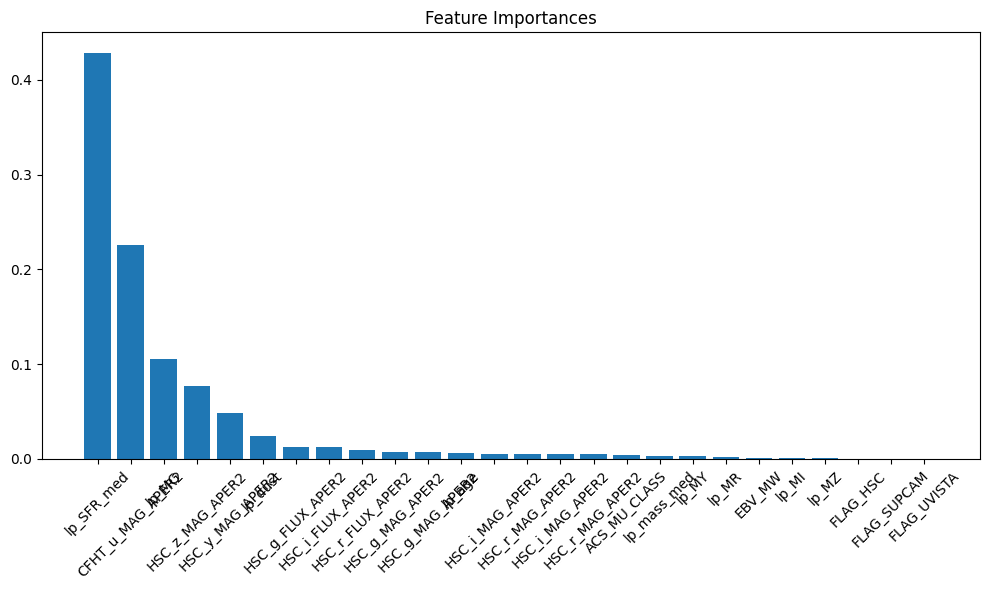

In [ ]:
# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
tree_predictions = np.array([tree.predict(X_train.values) for tree in rf.estimators_])


In [ ]:
n_components = 5
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(tree_predictions.T)

GaussianMixture(n_components=5, random_state=42)

In [ ]:
pdfs = gmm.score_samples(tree_predictions.T)
pdfs = np.exp(pdfs)

In [ ]:
# Collect predictions from all trees for X_test
tree_predictions_test = np.array([tree.predict(X_test.values) for tree in rf.estimators_])

# Fit the GMM on the training predictions but use it to generate PDFs for test set
pdfs_test = gmm.score_samples(tree_predictions_test.T)
pdfs_test = np.exp(pdfs_test)


In [ ]:
mean_predictions_test = np.mean(tree_predictions_test, axis=0)


In [ ]:
tree_predictions_test = np.array([tree.predict(X_test.values) for tree in rf.estimators_])
pdfs_test = gmm.score_samples(tree_predictions_test.T)
pdfs_test = np.exp(pdfs_test)


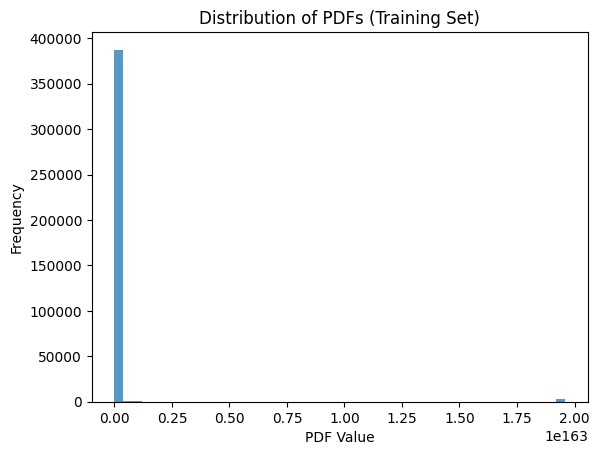

In [ ]:
import matplotlib.pyplot as plt

plt.hist(pdfs, bins=50, alpha=0.75)
plt.title('Distribution of PDFs (Training Set)')
plt.xlabel('PDF Value')
plt.ylabel('Frequency')
plt.show()


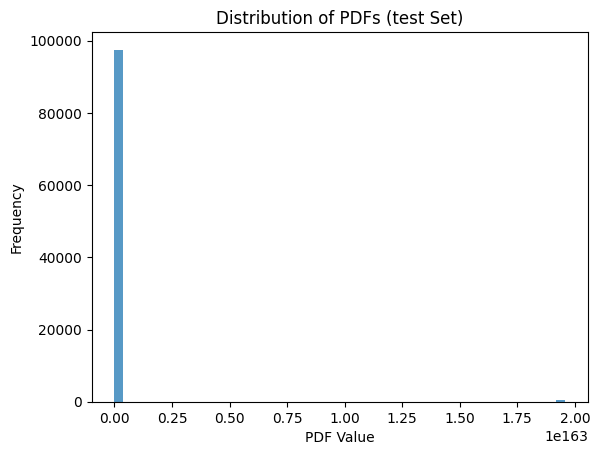

In [ ]:
import matplotlib.pyplot as plt

plt.hist(pdfs_test, bins=50, alpha=0.75)
plt.title('Distribution of PDFs (test Set)')
plt.xlabel('PDF Value')
plt.ylabel('Frequency')
plt.show()
